In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/Churn_Modelling.csv')

In [5]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)
correlation = df_encoded.corr()
print(correlation['Exited'].sort_values(ascending=False))


Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


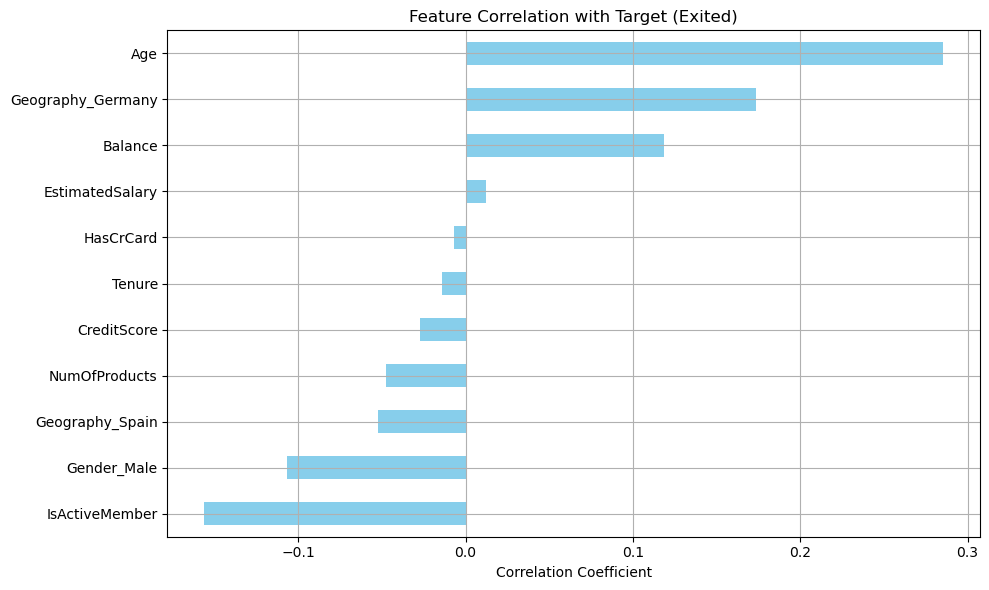

In [ ]:
import matplotlib.pyplot as plt

# Keep only features (excluding 'Exited')
corr = df_encoded.corr()['Exited'].drop('Exited').sort_values()

plt.figure(figsize=(10, 6))
corr.plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with Target (Exited)')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [18]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [19]:
X_train_Scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_Scaled,y_train,epochs=1000, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 3.1862 - accuracy: 0.7934 - val_loss: 3.1043 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 3.1862 - accuracy: 0.7934 - val_loss: 3.1043 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 3.1862 - accuracy: 0.7934 - val_loss: 3.1043 - val_accuracy: 0.7987
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 3.1862 - accuracy: 0.7934 - val_loss: 3.1043 - val_accuracy: 0.7987
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 3.1862 - accuracy: 0.7934 - val_loss: 3.1043 - val_accuracy: 0.7987
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 3.1862 - accuracy: 0.7934 - val_loss: 3.1043 - val_accuracy: 0.7987
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 3.1862 - accuracy: 0.7934 - val_loss: 3.1043 - val_accuracy: 0.7987

In [25]:
y_log = model.predict(X_test_Scaled)

63/63 [==============================] - 0s 1ms/step


In [26]:
y_pred  = np.where(y_log>0.5,1,0)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8035


In [ ]:
history.history

{'loss': [3.186222791671753,
  3.186215400695801,
  3.186215877532959,
  3.1862170696258545,
  3.1862151622772217,
  3.1862168312072754,
  3.1862149238586426,
  3.1862151622772217,
  3.186215400695801,
  3.186215877532959,
  3.1862168312072754,
  3.1862142086029053,
  3.186216354370117,
  3.186216115951538,
  3.186216115951538,
  3.186215877532959,
  3.186215877532959,
  3.1862149238586426,
  3.186215400695801,
  3.1862146854400635,
  3.186216354370117,
  3.1862146854400635,
  3.1862151622772217,
  3.1862149238586426,
  3.186216354370117,
  3.1862149238586426,
  3.186215877532959,
  3.186215400695801,
  3.1862146854400635,
  3.1862149238586426,
  3.186215400695801,
  3.1862146854400635,
  3.186215877532959,
  3.1862149238586426,
  3.186215400695801,
  3.186216115951538,
  3.1862151622772217,
  3.1862149238586426,
  3.1862151622772217,
  3.186216354370117,
  3.186216354370117,
  3.1862149238586426,
  3.1862151622772217,
  3.186215400695801,
  3.186216115951538,
  3.186215400695801,
  3.

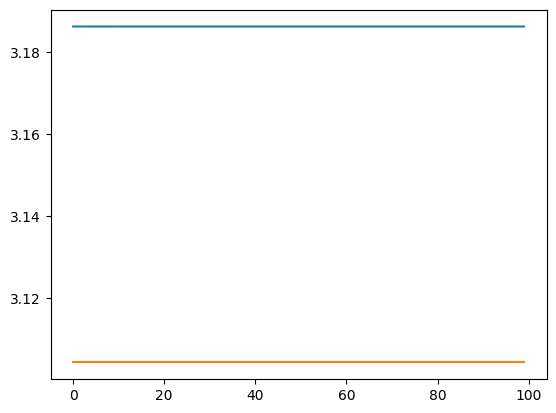

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

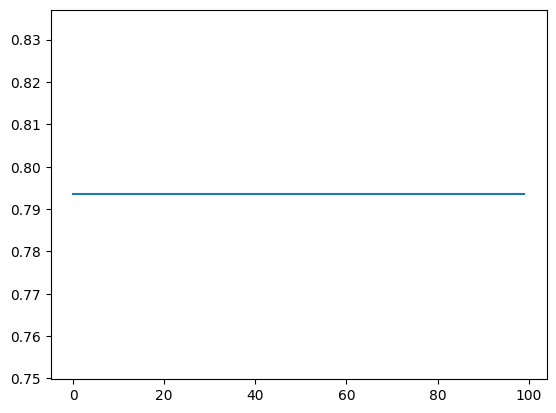

In [30]:
plt.plot(history.history['accuracy'])

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

1/1 [==============================] - 0s 199ms/step
SGD Prediction for input 0.5: [[1.5394951]]
1/1 [==============================] - 0s 117ms/step
Adam Prediction for input 0.5: [[1.5692838]]


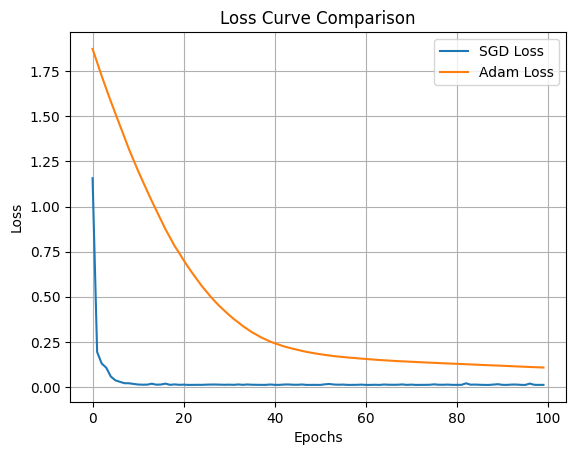

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


x = np.linspace(0, 1, 100)
y = 3 * x + np.random.normal(0, 0.1, 100)

model_sgd = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1)
])

model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')
history_sgd = model_sgd.fit(x, y, epochs=100, verbose=0)

print("SGD Prediction for input 0.5:", model_sgd.predict([0.5]))

model_adam = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1)
])

model_adam.compile(optimizer='adam', loss='mse')
history_adam = model_adam.fit(x, y, epochs=100, verbose=0)

print("Adam Prediction for input 0.5:", model_adam.predict([0.5]))


plt.plot(history_sgd.history['loss'], label='SGD Loss')
plt.plot(history_adam.history['loss'], label='Adam Loss')
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()





